In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import cv2
from skimage.transform import resize
from skimage.io import imread
from sklearn.utils import shuffle
import random
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

### Loading Images

In [2]:
Categories=['rock','paper','scissors']
train_dir = 'rps-split\\train'
test_dir = 'rps-split\\test'
val_dir = 'rps-split\\val'

flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(train_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,1))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for train')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x_train=df.iloc[:,:-1] #input data 
y_train=df.iloc[:,-1] #output data
x_train=x_train.sample(frac=1, random_state=42).reset_index(drop=True)
y_train=y_train.sample(frac=1, random_state=42).reset_index(drop=True)



flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(test_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,1))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for test')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x_test=df.iloc[:,:-1] #input data 
y_test=df.iloc[:,-1] #output data

flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(val_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,1))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for val')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x_val=df.iloc[:,:-1] #input data 
y_val=df.iloc[:,-1] #output data

loaded category:rock successfully for train
loaded category:paper successfully for train
loaded category:scissors successfully for train
loaded category:rock successfully for test
loaded category:paper successfully for test
loaded category:scissors successfully for test
loaded category:rock successfully for val
loaded category:paper successfully for val
loaded category:scissors successfully for val


In [3]:
x_train.shape

(1531, 22500)

In [4]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,22490,22491,22492,22493,22494,22495,22496,22497,22498,22499
0,0.282439,0.289924,0.293366,0.300145,0.303655,0.308242,0.314224,0.317845,0.324846,0.325541,...,0.309310,0.307258,0.305002,0.299647,0.298464,0.293929,0.289883,0.283850,0.283182,0.269569
1,0.307829,0.299331,0.296886,0.301255,0.296857,0.306606,0.309610,0.308545,0.304403,0.308739,...,0.333674,0.332998,0.328856,0.331649,0.324068,0.326655,0.321872,0.321227,0.318055,0.321791
2,0.259973,0.268775,0.275280,0.280152,0.285039,0.285782,0.288814,0.292053,0.299367,0.303309,...,0.289264,0.288739,0.285866,0.280724,0.279225,0.273654,0.267650,0.263894,0.262009,0.252174
3,0.306726,0.303777,0.305048,0.305458,0.303881,0.309817,0.311885,0.309504,0.310891,0.314309,...,0.334475,0.337161,0.331765,0.335954,0.328828,0.325748,0.328762,0.326534,0.322945,0.324864
4,0.216188,0.223491,0.231423,0.240872,0.241220,0.249937,0.252278,0.255959,0.261174,0.265196,...,0.228960,0.225911,0.219907,0.219417,0.212889,0.205368,0.205186,0.201541,0.197776,0.189999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,0.316758,0.319122,0.315090,0.317579,0.319337,0.326543,0.325820,0.322612,0.325771,0.332192,...,0.344872,0.343667,0.348252,0.339113,0.332841,0.333563,0.330319,0.335869,0.335691,0.332603
1527,0.382267,0.381571,0.378451,0.383468,0.384683,0.388388,0.387331,0.394883,0.393906,0.397792,...,0.425765,0.420005,0.422743,0.420270,0.416993,0.414020,0.414914,0.414313,0.415321,0.415032
1528,0.293139,0.287507,0.286387,0.289640,0.288580,0.296019,0.298054,0.285896,0.290841,0.299751,...,0.316646,0.314835,0.314268,0.311509,0.305610,0.309481,0.307940,0.304920,0.302529,0.301563
1529,0.304618,0.297201,0.304142,0.305809,0.306728,0.308514,0.317587,0.312711,0.313207,0.312118,...,0.332991,0.327786,0.325019,0.329533,0.324487,0.320900,0.321537,0.317153,0.316885,0.318734


In [5]:
y_train

0       1
1       0
2       0
3       2
4       1
       ..
1526    2
1527    2
1528    1
1529    2
1530    2
Name: Target, Length: 1531, dtype: int32

### Searching for best-performing model on training set

In [146]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
#param_grid={'C':[0.1],'gamma':[0.0001],'kernel':['rbf','poly']}
model=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
model.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.342 total time=  32.1s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.343 total time=  30.8s
[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.343 total time=  30.4s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.343 total time=  41.5s
[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.343 total time=  33.5s
[CV 1/5] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.342 total time=  26.5s
[CV 2/5] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.343 total time=  24.0s
[CV 3/5] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.343 total time=  20.9s
[CV 4/5] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.343 total time=  23.4s
[CV 5/5] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.343 total time=  21.1s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.704 total time=  32.7s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf

[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.392 total time=  32.3s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.395 total time=  36.6s
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.392 total time=  31.5s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.363 total time=  30.5s
[CV 1/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.844 total time=  10.2s
[CV 2/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.824 total time=  15.9s
[CV 3/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.827 total time=  14.5s
[CV 4/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.837 total time=  16.3s
[CV 5/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.850 total time=   9.4s
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.342 total time=  28.8s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.343 total time=  27.1s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.343 total time=  32.2s
[CV 4/5] END .........C=10, 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']},
             verbose=3)

In [147]:
print(model.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [14]:
param_grid={'C':[10,100,1000],'gamma':[0.001],'kernel':['rbf','poly'],'degree':[3,4,5]}
#param_grid={'C':[0.1],'gamma':[0.0001],'kernel':['rbf','poly']}
model=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
model.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END C=10, degree=3, gamma=0.001, kernel=rbf;, score=0.889 total time=  18.5s
[CV 2/5] END C=10, degree=3, gamma=0.001, kernel=rbf;, score=0.902 total time=  15.5s
[CV 3/5] END C=10, degree=3, gamma=0.001, kernel=rbf;, score=0.915 total time=  15.7s
[CV 4/5] END C=10, degree=3, gamma=0.001, kernel=rbf;, score=0.908 total time=  15.6s
[CV 5/5] END C=10, degree=3, gamma=0.001, kernel=rbf;, score=0.902 total time=  15.5s
[CV 1/5] END C=10, degree=3, gamma=0.001, kernel=poly;, score=0.844 total time=  10.5s
[CV 2/5] END C=10, degree=3, gamma=0.001, kernel=poly;, score=0.824 total time=  13.1s
[CV 3/5] END C=10, degree=3, gamma=0.001, kernel=poly;, score=0.827 total time=  11.7s
[CV 4/5] END C=10, degree=3, gamma=0.001, kernel=poly;, score=0.837 total time=  12.6s
[CV 5/5] END C=10, degree=3, gamma=0.001, kernel=poly;, score=0.850 total time=  10.5s
[CV 1/5] END C=10, degree=4, gamma=0.001, kernel=rbf;, score=0.889 total t

GridSearchCV(estimator=SVC(),
             param_grid={'C': [10, 100, 1000], 'degree': [3, 4, 5],
                         'gamma': [0.001], 'kernel': ['rbf', 'poly']},
             verbose=3)

In [15]:
print(model.best_params_)

{'C': 100, 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf'}


In [34]:
param_grid={'C':[0.1,1,10,100,1000],'kernel':['linear']}
model=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
model.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.733 total time=  12.9s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.696 total time=  10.8s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.739 total time=  10.6s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.686 total time=  10.7s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.709 total time=  10.2s
[CV 1/5] END ................C=1, kernel=linear;, score=0.658 total time=  12.7s
[CV 2/5] END ................C=1, kernel=linear;, score=0.683 total time=  13.7s
[CV 3/5] END ................C=1, kernel=linear;, score=0.683 total time=  11.8s
[CV 4/5] END ................C=1, kernel=linear;, score=0.647 total time=  12.7s
[CV 5/5] END ................C=1, kernel=linear;, score=0.683 total time=  12.6s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.658 total time=  12.3s
[CV 2/5] END ...............C=10, kernel=linear;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
             verbose=3)

### RBF with c=100, gamma=0.001 performs best on training set
### Changing polynomial dimensions does not have significant impact on training accuracy

In [6]:
best_train_model = svm.SVC(kernel='rbf', gamma=0.001, C=100).fit(x_train, y_train)

In [7]:
#model.fit(x_train,y_train)
y_pred=best_train_model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
#print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0
 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 0 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 0 1 1 1 1 0 1 1 1 2 1 0 1 1 1 2 1 1 1
 1 1 1 1 2 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 2 2 2 2 0
 2 2 2 2 2 2 2 1 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2
 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
The actual data is:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [9]:
def test_score(trained_model):
    pred_y = trained_model.predict(x_test)
    print(confusion_matrix(y_test,pred_y))
    print(classification_report(y_test,pred_y))

In [10]:
def train_score(trained_model):
    pred_y = trained_model.predict(x_train)
    print(confusion_matrix(y_train,pred_y))
    print(classification_report(y_train,pred_y))

In [11]:
def val_score(trained_model):
    pred_y = trained_model.predict(x_val)
    print(confusion_matrix(y_val,pred_y))
    print(classification_report(y_val,pred_y))

In [13]:
#C=100, gamma=0.001, kernel=rbf
val_score(best_train_model)

[[ 98   3   8]
 [  4  92  11]
 [  3   1 108]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       109
           1       0.96      0.86      0.91       107
           2       0.85      0.96      0.90       112

    accuracy                           0.91       328
   macro avg       0.91      0.91      0.91       328
weighted avg       0.91      0.91      0.91       328



In [14]:
train_score(best_train_model)

[[508   0   0]
 [  0 498   0]
 [  0   0 525]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       508
           1       1.00      1.00      1.00       498
           2       1.00      1.00      1.00       525

    accuracy                           1.00      1531
   macro avg       1.00      1.00      1.00      1531
weighted avg       1.00      1.00      1.00      1531



### Testing alternative models

In [15]:
val_score(svm.SVC(C=1000,kernel='rbf',gamma=0.001).fit(x_train, y_train))

[[ 98   3   8]
 [  4  92  11]
 [  3   1 108]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       109
           1       0.96      0.86      0.91       107
           2       0.85      0.96      0.90       112

    accuracy                           0.91       328
   macro avg       0.91      0.91      0.91       328
weighted avg       0.91      0.91      0.91       328



In [16]:
#C=0.1, gamma=0.001, kernel=poly
val_score(svm.SVC(C=0.1, kernel='poly').fit(x_train, y_train))

[[97  3  9]
 [10 88  9]
 [10  5 97]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       109
           1       0.92      0.82      0.87       107
           2       0.84      0.87      0.85       112

    accuracy                           0.86       328
   macro avg       0.86      0.86      0.86       328
weighted avg       0.86      0.86      0.86       328



In [17]:
val_score(svm.SVC(C=1, kernel='poly').fit(x_train, y_train))

[[98  4  7]
 [10 88  9]
 [10  4 98]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       109
           1       0.92      0.82      0.87       107
           2       0.86      0.88      0.87       112

    accuracy                           0.87       328
   macro avg       0.87      0.87      0.87       328
weighted avg       0.87      0.87      0.87       328



In [18]:
val_score(svm.SVC(C=10, kernel='poly').fit(x_train, y_train))

[[98  4  7]
 [10 88  9]
 [10  4 98]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       109
           1       0.92      0.82      0.87       107
           2       0.86      0.88      0.87       112

    accuracy                           0.87       328
   macro avg       0.87      0.87      0.87       328
weighted avg       0.87      0.87      0.87       328



In [19]:
val_score(svm.SVC(C=100, kernel='poly').fit(x_train, y_train))

[[98  4  7]
 [10 88  9]
 [10  4 98]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       109
           1       0.92      0.82      0.87       107
           2       0.86      0.88      0.87       112

    accuracy                           0.87       328
   macro avg       0.87      0.87      0.87       328
weighted avg       0.87      0.87      0.87       328



In [20]:
val_score(svm.SVC(C=0.1, gamma=0.001, kernel='rbf').fit(x_train, y_train))

[[72 10 27]
 [10 72 25]
 [18  4 90]]
              precision    recall  f1-score   support

           0       0.72      0.66      0.69       109
           1       0.84      0.67      0.75       107
           2       0.63      0.80      0.71       112

    accuracy                           0.71       328
   macro avg       0.73      0.71      0.71       328
weighted avg       0.73      0.71      0.71       328



In [21]:
train_score(svm.SVC(C=0.1, gamma=0.001, kernel='rbf').fit(x_train, y_train))

[[346  61 101]
 [ 50 323 125]
 [ 79  19 427]]
              precision    recall  f1-score   support

           0       0.73      0.68      0.70       508
           1       0.80      0.65      0.72       498
           2       0.65      0.81      0.72       525

    accuracy                           0.72      1531
   macro avg       0.73      0.71      0.72      1531
weighted avg       0.73      0.72      0.72      1531



In [22]:
val_score(svm.SVC(C=1, gamma=0.001, kernel='rbf').fit(x_train, y_train))

[[85  5 19]
 [ 7 85 15]
 [12  5 95]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       109
           1       0.89      0.79      0.84       107
           2       0.74      0.85      0.79       112

    accuracy                           0.81       328
   macro avg       0.82      0.81      0.81       328
weighted avg       0.81      0.81      0.81       328



In [23]:
val_score(svm.SVC(C=10, gamma=0.001, kernel='rbf').fit(x_train, y_train))

[[ 95   3  11]
 [  5  92  10]
 [  5   2 105]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       109
           1       0.95      0.86      0.90       107
           2       0.83      0.94      0.88       112

    accuracy                           0.89       328
   macro avg       0.90      0.89      0.89       328
weighted avg       0.89      0.89      0.89       328



In [24]:
val_score(svm.SVC(C=100, degree=3, kernel='poly').fit(x_train, y_train))

[[98  4  7]
 [10 88  9]
 [10  4 98]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       109
           1       0.92      0.82      0.87       107
           2       0.86      0.88      0.87       112

    accuracy                           0.87       328
   macro avg       0.87      0.87      0.87       328
weighted avg       0.87      0.87      0.87       328



In [25]:
val_score(svm.SVC(C=100, degree=4, kernel='poly').fit(x_train, y_train))

[[96  4  9]
 [10 89  8]
 [ 9  4 99]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       109
           1       0.92      0.83      0.87       107
           2       0.85      0.88      0.87       112

    accuracy                           0.87       328
   macro avg       0.87      0.87      0.87       328
weighted avg       0.87      0.87      0.87       328



In [26]:
val_score(svm.SVC(C=100, degree=5, kernel='poly').fit(x_train, y_train))

[[96  4  9]
 [10 89  8]
 [ 8  6 98]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       109
           1       0.90      0.83      0.86       107
           2       0.85      0.88      0.86       112

    accuracy                           0.86       328
   macro avg       0.86      0.86      0.86       328
weighted avg       0.86      0.86      0.86       328



In [36]:
train_score(svm.SVC(C=100, degree=5, kernel='poly').fit(x_train, y_train))

[[508   0   0]
 [  0 498   0]
 [  0   0 525]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       508
           1       1.00      1.00      1.00       498
           2       1.00      1.00      1.00       525

    accuracy                           1.00      1531
   macro avg       1.00      1.00      1.00      1531
weighted avg       1.00      1.00      1.00      1531



In [27]:
val_score(svm.SVC(C=0.1, kernel='linear').fit(x_train, y_train))

[[82  5 22]
 [20 75 12]
 [24 13 75]]
              precision    recall  f1-score   support

           0       0.65      0.75      0.70       109
           1       0.81      0.70      0.75       107
           2       0.69      0.67      0.68       112

    accuracy                           0.71       328
   macro avg       0.72      0.71      0.71       328
weighted avg       0.71      0.71      0.71       328



In [28]:
train_score(svm.SVC(C=0.1, kernel='linear').fit(x_train, y_train))

[[481  10  17]
 [  1 489   8]
 [ 12   0 513]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       508
           1       0.98      0.98      0.98       498
           2       0.95      0.98      0.97       525

    accuracy                           0.97      1531
   macro avg       0.97      0.97      0.97      1531
weighted avg       0.97      0.97      0.97      1531



### Increasing polynomial dimensions marginally improves testing accuracy

In [29]:
val_score(svm.SVC(C=0.1, gamma=0.0001, kernel='rbf').fit(x_train, y_train))

[[  1   0 108]
 [  0   0 107]
 [  0   0 112]]
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       109
           1       0.00      0.00      0.00       107
           2       0.34      1.00      0.51       112

    accuracy                           0.34       328
   macro avg       0.45      0.34      0.18       328
weighted avg       0.45      0.34      0.18       328



C:\Users\jcrul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jcrul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jcrul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
train_score(svm.SVC(C=0.1, gamma=0.0001, kernel='rbf').fit(x_train, y_train))

[[  3   0 505]
 [  0   0 498]
 [  0   0 525]]
              precision    recall  f1-score   support

           0       1.00      0.01      0.01       508
           1       0.00      0.00      0.00       498
           2       0.34      1.00      0.51       525

    accuracy                           0.34      1531
   macro avg       0.45      0.34      0.17      1531
weighted avg       0.45      0.34      0.18      1531



C:\Users\jcrul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jcrul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jcrul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### RBF with c=100, gamma=0.001 still the most accurate with 91-92% on testing data and 100% on training data
### c=0.001 classifies all into scissors

## Decrease image quality from 150x150 to 32x32 for better comparison to neural nets

In [14]:
Categories=['rock','paper','scissors']
train_dir = 'rps-split\\train'
test_dir = 'rps-split\\test'
val_dir = 'rps-split\\val'

flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(train_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(32,32,1))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for train')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x_train=df.iloc[:,:-1] #input data 
y_train=df.iloc[:,-1] #output data
x_train=x_train.sample(frac=1, random_state=42).reset_index(drop=True)
y_train=y_train.sample(frac=1, random_state=42).reset_index(drop=True)



flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(test_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(32,32,1))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for test')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x_test=df.iloc[:,:-1] #input data 
y_test=df.iloc[:,-1] #output data

flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(val_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(32,32,1))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for val')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x_val=df.iloc[:,:-1] #input data 
y_val=df.iloc[:,-1] #output data

loaded category:rock successfully for train
loaded category:paper successfully for train
loaded category:scissors successfully for train
loaded category:rock successfully for test
loaded category:paper successfully for test
loaded category:scissors successfully for test
loaded category:rock successfully for val
loaded category:paper successfully for val
loaded category:scissors successfully for val


In [15]:
x_train.shape

(1531, 1024)

In [33]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.300570,0.321333,0.339861,0.356015,0.368621,0.375393,0.386557,0.392265,0.396568,0.401079,...,0.366491,0.364223,0.361065,0.355037,0.347758,0.338876,0.328757,0.317450,0.305523,0.289068
1,0.305769,0.309675,0.316426,0.327396,0.332671,0.341594,0.347691,0.352916,0.357916,0.363374,...,0.371226,0.368799,0.363895,0.358266,0.353350,0.345255,0.337634,0.334755,0.330602,0.322242
2,0.279768,0.298246,0.317711,0.332790,0.345631,0.352844,0.363831,0.369659,0.374380,0.378595,...,0.352845,0.349581,0.346031,0.339196,0.330828,0.320949,0.309510,0.298604,0.285769,0.269304
3,0.309114,0.312441,0.320083,0.330972,0.337421,0.344661,0.348730,0.355505,0.360473,0.367050,...,0.369720,0.368379,0.364475,0.357779,0.353295,0.345417,0.341060,0.337860,0.332617,0.324913
4,0.238294,0.259614,0.275919,0.290672,0.297517,0.306122,0.314081,0.321606,0.325926,0.328438,...,0.252287,0.253382,0.257844,0.265044,0.265494,0.258059,0.249070,0.238190,0.221616,0.203713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,0.320905,0.328758,0.336999,0.347664,0.354435,0.363455,0.368484,0.373455,0.379199,0.384777,...,0.386852,0.385306,0.381406,0.377614,0.370012,0.362756,0.356964,0.349564,0.344221,0.338484
1527,0.389369,0.392769,0.389571,0.386150,0.392524,0.402755,0.406559,0.410655,0.418259,0.437901,...,0.456071,0.454156,0.450985,0.448131,0.443195,0.436381,0.431848,0.426035,0.423116,0.421126
1528,0.292997,0.296107,0.303562,0.315029,0.321099,0.329147,0.333897,0.339125,0.344243,0.350723,...,0.356617,0.356413,0.350368,0.343588,0.339844,0.331346,0.324399,0.320611,0.314091,0.307539
1529,0.308246,0.313464,0.319537,0.331429,0.337286,0.345225,0.350081,0.354131,0.357728,0.363382,...,0.369423,0.367132,0.361423,0.354030,0.349208,0.340947,0.335438,0.333584,0.329611,0.323610


In [22]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf']}
model=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
model.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.342 total time=   1.2s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.343 total time=   1.2s
[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.343 total time=   1.3s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.343 total time=   1.2s
[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.343 total time=   1.2s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.342 total time=   1.2s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.343 total time=   1.2s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.343 total time=   1.2s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.343 total time=   1.2s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.343 total time=   1.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.795 total time=   1.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1], 'kernel': ['rbf']},
             verbose=3)

In [23]:
print(model.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [24]:
param_grid={'C':[0.1,1,10,100],'degree':[3,4,5],'kernel':['poly']}
model=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
model.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ......C=0.1, degree=3, kernel=poly;, score=0.853 total time=   0.5s
[CV 2/5] END ......C=0.1, degree=3, kernel=poly;, score=0.846 total time=   0.6s
[CV 3/5] END ......C=0.1, degree=3, kernel=poly;, score=0.846 total time=   0.6s
[CV 4/5] END ......C=0.1, degree=3, kernel=poly;, score=0.846 total time=   0.6s
[CV 5/5] END ......C=0.1, degree=3, kernel=poly;, score=0.863 total time=   0.6s
[CV 1/5] END ......C=0.1, degree=4, kernel=poly;, score=0.863 total time=   0.5s
[CV 2/5] END ......C=0.1, degree=4, kernel=poly;, score=0.859 total time=   0.5s
[CV 3/5] END ......C=0.1, degree=4, kernel=poly;, score=0.843 total time=   0.5s
[CV 4/5] END ......C=0.1, degree=4, kernel=poly;, score=0.876 total time=   0.5s
[CV 5/5] END ......C=0.1, degree=4, kernel=poly;, score=0.876 total time=   0.5s
[CV 1/5] END ......C=0.1, degree=5, kernel=poly;, score=0.857 total time=   0.5s
[CV 2/5] END ......C=0.1, degree=5, kernel=poly;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [3, 4, 5],
                         'kernel': ['poly']},
             verbose=3)

In [25]:
print(model.best_params_)

{'C': 0.1, 'degree': 5, 'kernel': 'poly'}


### Compare with linear kernel

In [3]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid={'C':[0.1,1,10,100],'kernel':['linear']}
model=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
model.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.746 total time=   1.4s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.729 total time=   1.2s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.755 total time=   0.9s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.719 total time=   0.8s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.748 total time=   0.8s
[CV 1/5] END ................C=1, kernel=linear;, score=0.772 total time=   0.9s
[CV 2/5] END ................C=1, kernel=linear;, score=0.745 total time=   0.8s
[CV 3/5] END ................C=1, kernel=linear;, score=0.775 total time=   0.8s
[CV 4/5] END ................C=1, kernel=linear;, score=0.729 total time=   0.8s
[CV 5/5] END ................C=1, kernel=linear;, score=0.761 total time=   0.8s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.717 total time=   0.9s
[CV 2/5] END ...............C=10, kernel=linear;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
             verbose=3)

### Lower-quality images: best gamma 0.1 instead of 0.001, best C 10 instead of 100

In [34]:
val_score(svm.SVC(C=10, gamma=0.1, kernel='rbf').fit(x_train, y_train))

[[101   2   6]
 [  4  94   9]
 [  3   1 108]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       109
           1       0.97      0.88      0.92       107
           2       0.88      0.96      0.92       112

    accuracy                           0.92       328
   macro avg       0.93      0.92      0.92       328
weighted avg       0.93      0.92      0.92       328



In [44]:
train_score(svm.SVC(C=10, gamma=0.1, kernel='rbf').fit(x_train, y_train))

[[508   0   0]
 [  0 498   0]
 [  0   0 525]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       508
           1       1.00      1.00      1.00       498
           2       1.00      1.00      1.00       525

    accuracy                           1.00      1531
   macro avg       1.00      1.00      1.00      1531
weighted avg       1.00      1.00      1.00      1531



In [39]:
test_score(svm.SVC(kernel='rbf', gamma=0.1, C=10).fit(x_train, y_train))

[[102   0   7]
 [  3  98   6]
 [  5   2 106]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       109
           1       0.98      0.92      0.95       107
           2       0.89      0.94      0.91       113

    accuracy                           0.93       329
   macro avg       0.93      0.93      0.93       329
weighted avg       0.93      0.93      0.93       329



In [36]:
val_score(svm.SVC(C=10, gamma=0.001, kernel='rbf').fit(x_train, y_train))

[[76  8 25]
 [10 77 20]
 [16  9 87]]
              precision    recall  f1-score   support

           0       0.75      0.70      0.72       109
           1       0.82      0.72      0.77       107
           2       0.66      0.78      0.71       112

    accuracy                           0.73       328
   macro avg       0.74      0.73      0.73       328
weighted avg       0.74      0.73      0.73       328



In [37]:
val_score(svm.SVC(C=100, gamma=0.1, kernel='rbf').fit(x_train, y_train))

[[101   2   6]
 [  4  94   9]
 [  3   1 108]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       109
           1       0.97      0.88      0.92       107
           2       0.88      0.96      0.92       112

    accuracy                           0.92       328
   macro avg       0.93      0.92      0.92       328
weighted avg       0.93      0.92      0.92       328



In [45]:
test_score(svm.SVC(C=100, gamma=0.1, kernel='rbf').fit(x_train, y_train))

[[102   0   7]
 [  3  98   6]
 [  5   2 106]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       109
           1       0.98      0.92      0.95       107
           2       0.89      0.94      0.91       113

    accuracy                           0.93       329
   macro avg       0.93      0.93      0.93       329
weighted avg       0.93      0.93      0.93       329



In [45]:
train_score(svm.SVC(C=0.1, kernel='linear').fit(x_train, y_train))

[[406  38  64]
 [ 39 369  90]
 [ 62  29 434]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       508
           1       0.85      0.74      0.79       498
           2       0.74      0.83      0.78       525

    accuracy                           0.79      1531
   macro avg       0.80      0.79      0.79      1531
weighted avg       0.79      0.79      0.79      1531



In [40]:
val_score(svm.SVC(C=0.1, kernel='linear').fit(x_train, y_train))

[[83  4 22]
 [14 78 15]
 [14 11 87]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       109
           1       0.84      0.73      0.78       107
           2       0.70      0.78      0.74       112

    accuracy                           0.76       328
   macro avg       0.76      0.76      0.76       328
weighted avg       0.76      0.76      0.76       328



In [41]:
test_score(svm.SVC(C=0.1, kernel='linear').fit(x_train, y_train))

[[89  4 16]
 [ 9 73 25]
 [17 10 86]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       109
           1       0.84      0.68      0.75       107
           2       0.68      0.76      0.72       113

    accuracy                           0.75       329
   macro avg       0.76      0.75      0.75       329
weighted avg       0.76      0.75      0.75       329



In [53]:
train_score(svm.SVC(C=0.1, kernel='poly',degree=5).fit(x_train, y_train))

[[508   0   0]
 [  0 498   0]
 [  0   0 525]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       508
           1       1.00      1.00      1.00       498
           2       1.00      1.00      1.00       525

    accuracy                           1.00      1531
   macro avg       1.00      1.00      1.00      1531
weighted avg       1.00      1.00      1.00      1531



In [42]:
val_score(svm.SVC(C=0.1, kernel='poly',degree=5).fit(x_train, y_train))

[[95  6  8]
 [ 9 90  8]
 [ 8  6 98]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       109
           1       0.88      0.84      0.86       107
           2       0.86      0.88      0.87       112

    accuracy                           0.86       328
   macro avg       0.86      0.86      0.86       328
weighted avg       0.86      0.86      0.86       328



In [43]:
test_score(svm.SVC(C=0.1, kernel='poly',degree=5).fit(x_train, y_train))

[[104   1   4]
 [  4  94   9]
 [ 11   7  95]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       109
           1       0.92      0.88      0.90       107
           2       0.88      0.84      0.86       113

    accuracy                           0.89       329
   macro avg       0.89      0.89      0.89       329
weighted avg       0.89      0.89      0.89       329



### Slightly higher accuracy with lower-quality images (93% test/train, 92% val)

### Show first image in dataset

In [55]:
from PIL import Image as im

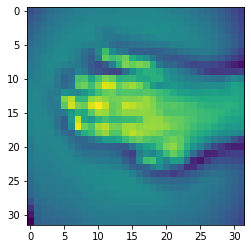

In [59]:
first_image = np.array(x_train.T[0])
first_image = np.reshape(first_image, (32, 32))
plt.imshow(first_image)

In [60]:
y_val

0      0
1      0
2      0
3      0
4      0
      ..
323    2
324    2
325    2
326    2
327    2
Name: Target, Length: 328, dtype: int32

In [61]:
y_pred_val

array([0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,

### Compare misclassified and correctly classified images

In [68]:
missclassified_indices = []
for i in range(0,y_val.size):
    if y_val[i] != y_pred_val[i]:
        missclassified_indices.append(i)

In [69]:
missclassified_indices

[5,
 7,
 27,
 41,
 46,
 48,
 50,
 60,
 110,
 117,
 130,
 134,
 145,
 156,
 164,
 176,
 183,
 193,
 205,
 206,
 215,
 220,
 234,
 235,
 297]

Predicted class 2
Actual class 0


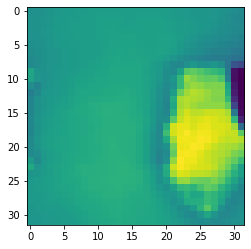

In [75]:
plt.imshow(np.reshape(np.array(x_val.T[5]), (32, 32)))
print("Predicted class",y_pred_val[5])
print("Actual class",y_val[5])

Predicted class 1
Actual class 0


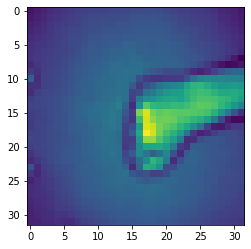

In [76]:
plt.imshow(np.reshape(np.array(x_val.T[7]), (32, 32)))
print("Predicted class",y_pred_val[7])
print("Actual class",y_val[7])

Predicted class 0
Actual class 0


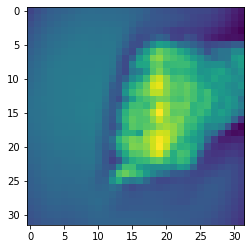

In [80]:
plt.imshow(np.reshape(np.array(x_val.T[6]), (32, 32)))
print("Predicted class",y_pred_val[6])
print("Actual class",y_val[6])

Predicted class 2
Actual class 1


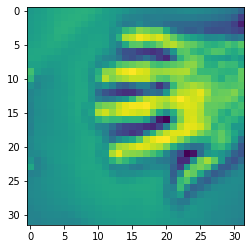

In [77]:
plt.imshow(np.reshape(np.array(x_val.T[130]), (32, 32)))
print("Predicted class",y_pred_val[130])
print("Actual class",y_val[130])

Predicted class 1
Actual class 1


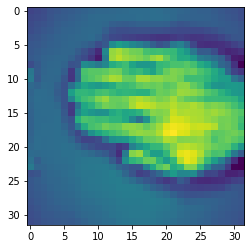

In [81]:
plt.imshow(np.reshape(np.array(x_val.T[131]), (32, 32)))
print("Predicted class",y_pred_val[131])
print("Actual class",y_val[131])

Predicted class 1
Actual class 2


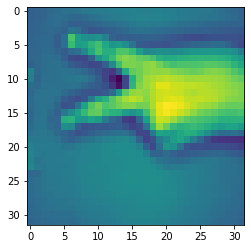

In [79]:
plt.imshow(np.reshape(np.array(x_val.T[297]), (32, 32)))
print("Predicted class",y_pred_val[297])
print("Actual class",y_val[297])

Predicted class 2
Actual class 2


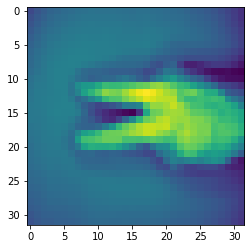

In [82]:
plt.imshow(np.reshape(np.array(x_val.T[298]), (32, 32)))
print("Predicted class",y_pred_val[298])
print("Actual class",y_val[298])

### Test model on new dataset: 3 images of my own hand from each class

In [18]:
Categories=['rock','paper','scissors']
self_test_dir = 'rps-self'

flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(self_test_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(32,32,1))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for train')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
self_test=df.iloc[:,:-1] #input data
y_self_test=df.iloc[:,-1] #output data

loaded category:rock successfully for train
loaded category:paper successfully for train
loaded category:scissors successfully for train


In [19]:
self_test

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.178039,0.182196,0.165139,0.172490,0.176392,0.166528,0.174237,0.190188,0.197409,0.186793,...,0.140960,0.133996,0.109639,0.111961,0.111690,0.111101,0.112002,0.107377,0.101553,0.113385
1,0.143245,0.153305,0.164382,0.168630,0.161523,0.167237,0.162833,0.183976,0.197247,0.183611,...,0.090048,0.092607,0.085328,0.089864,0.098328,0.087142,0.094777,0.100788,0.104504,0.107505
2,0.176348,0.201244,0.195703,0.200994,0.195285,0.198313,0.202585,0.227009,0.236194,0.218017,...,0.150978,0.154657,0.170402,0.172479,0.163641,0.151358,0.144133,0.143959,0.132867,0.109082
3,0.156532,0.170136,0.183074,0.169675,0.160600,0.173977,0.175296,0.179433,0.198849,0.203328,...,0.185190,0.177184,0.180812,0.161494,0.173493,0.170275,0.146008,0.166176,0.182307,0.172834
4,0.176548,0.178792,0.208152,0.189680,0.181414,0.171399,0.187340,0.193791,0.206729,0.202104,...,0.175421,0.174297,0.179069,0.159136,0.144950,0.156650,0.155396,0.171002,0.189619,0.178380
5,0.218505,0.194592,0.182571,0.211803,0.201469,0.186450,0.182295,0.201280,0.196275,0.223188,...,0.201933,0.188073,0.194983,0.187534,0.169350,0.191301,0.164963,0.150963,0.180181,0.181682
6,0.229906,0.226549,0.223941,0.266388,0.253189,0.241487,0.230407,0.228665,0.220661,0.252231,...,0.226982,0.239590,0.207875,0.192654,0.205396,0.207685,0.232830,0.221853,0.192103,0.216310
7,0.223898,0.237708,0.232963,0.256087,0.248619,0.251376,0.275604,0.259643,0.252373,0.256310,...,0.227808,0.241162,0.234708,0.247154,0.233753,0.234250,0.244511,0.215764,0.243997,0.262670
8,0.213048,0.228964,0.218947,0.203342,0.212881,0.227640,0.252077,0.247121,0.233355,0.232729,...,0.243442,0.239191,0.233412,0.236160,0.203854,0.221795,0.217661,0.201253,0.211146,0.206282


In [12]:
from PIL import Image as im

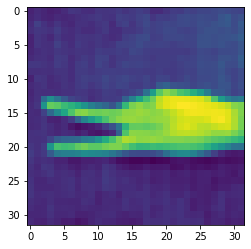

In [29]:
plt.imshow(np.reshape(np.array(self_test.T[8]), (32, 32)))

In [21]:
best_model = svm.SVC(kernel='rbf', gamma=0.1, C=10).fit(x_train, y_train)

In [22]:
best_model.predict(self_test)

array([2, 2, 2, 2, 2, 2, 2, 2, 2])

### RBF classifies all new images as scissors

In [30]:
poly_model = svm.SVC(C=0.1, kernel='poly',degree=5).fit(x_train, y_train)

In [31]:
poly_model.predict(self_test)

array([2, 2, 2, 0, 0, 0, 2, 2, 2])

### Polynomial model confuses rock for scissors and paper for rock

In [32]:
linear_model = svm.SVC(C=0.1, kernel='linear').fit(x_train, y_train)

In [33]:
linear_model.predict(self_test)

array([1, 1, 1, 1, 1, 1, 1, 2, 1])

### Linear model predicts nearly all as paper